In [38]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import geopandas as gpd
import fiona
#from pandana.loaders import osm

import pickle

import os



In [32]:
def saveGraph(G,name):
    with open('data/'+name+'.pkl', 'wb') as output: 
        pickle.dump(G, output, pickle.HIGHEST_PROTOCOL)

# Arrondissement

<AxesSubplot:>

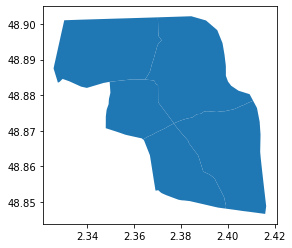

In [35]:
districts = "data/data_original/arrondissements.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf = gpd.read_file(districts, driver='KML')
targets = [str(750000000 + x) for x in [18,19,20,10,11]]
df = gdf[gdf.Name.isin(targets)]
saveGraph(df,"district")
zoi = df.geometry.unary_union
saveGraph(zoi,"zoi")
[west, south, east, north] = df.total_bounds
print()
df.plot()

In [29]:
df.total_bounds

array([ 2.32559016, 48.8466125 ,  2.41643101, 48.90216191])

Data loaded. Displaying routes


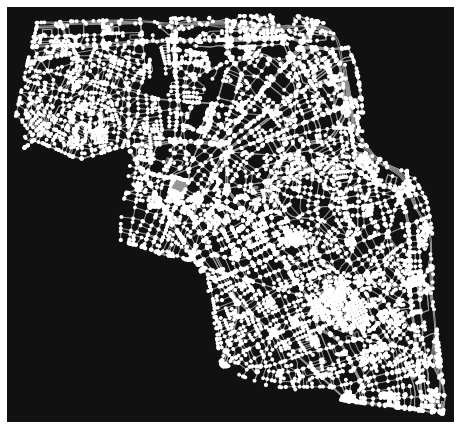

In [49]:
# create network from that bounding box
if not os.path.isfile('./data/G2.pkl'):
    print("Creating the cache")
    G2 = ox.graph_from_polygon(zoi, network_type='all')
    #G2 = ox.graph_from_bbox(north, south, east, west, network_type='all')
    G2 = ox.project_graph(G2)
    saveGraph(G2,"G2")
else:
    with open('./data/G2.pkl', 'rb') as input:
        G2 = pickle.load(input)
print("Data loaded. Displaying routes")
fig, ax = ox.plot_graph(G2)



In [55]:
# Let's give it a clean
G3 = ox.consolidate_intersections(G2, tolerance=0.00001, rebuild_graph=True, dead_ends=True)
saveGraph(G3,"G2_consolides")
ox.plot_graph(G3)

C:\Users\JON80843\Anaconda3\envs\Base\lib\site-packages\osmnx\simplification.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
C:\Users\JON80843\Anaconda3\envs\Base\lib\site-packages\osmnx\simplification.py:466: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


# Buildings

In [62]:
districts = "data/data_original/volumesbatisparis.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
BATS = gpd.read_file(districts, driver='KML')
BATS

,Name,Description,geometry
0,V,,"POLYGON ((2.35288 48.87764, 2.35286 48.87759, ..."
1,V,,"POLYGON ((2.35324 48.87779, 2.35323 48.87779, ..."
2,V,,"POLYGON ((2.35318 48.87807, 2.35312 48.87805, ..."
3,V,,"POLYGON ((2.35310 48.87807, 2.35302 48.87805, ..."
4,V,,"POLYGON ((2.35302 48.87849, 2.35286 48.87844, ..."
...,...,...,...
359876,V,,"POLYGON ((2.34524 48.88727, 2.34523 48.88717, ..."
359877,V,,"POLYGON ((2.34596 48.88671, 2.34594 48.88671, ..."
359878,V,,"POLYGON ((2.34700 48.88675, 2.34673 48.88669, ..."
359879,V,,"POLYGON ((2.33990 48.88726, 2.33990 48.88725, ..."


In [66]:
BoI = BATS[BATS.within(zoi)]
BoI

,Name,Description,geometry
0,V,,"POLYGON ((2.35288 48.87764, 2.35286 48.87759, ..."
1,V,,"POLYGON ((2.35324 48.87779, 2.35323 48.87779, ..."
2,V,,"POLYGON ((2.35318 48.87807, 2.35312 48.87805, ..."
3,V,,"POLYGON ((2.35310 48.87807, 2.35302 48.87805, ..."
4,V,,"POLYGON ((2.35302 48.87849, 2.35286 48.87844, ..."
...,...,...,...
359876,V,,"POLYGON ((2.34524 48.88727, 2.34523 48.88717, ..."
359877,V,,"POLYGON ((2.34596 48.88671, 2.34594 48.88671, ..."
359878,V,,"POLYGON ((2.34700 48.88675, 2.34673 48.88669, ..."
359879,V,,"POLYGON ((2.33990 48.88726, 2.33990 48.88725, ..."


<AxesSubplot:>

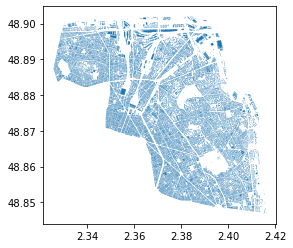

In [67]:
BoI.plot()

In [68]:
saveGraph(BoI,"BoI")

# Preparing trees

In [69]:
districts = "data/data_original/les-arbres.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
trees = gpd.read_file(districts, driver='KML')
trees

,Name,Description,geometry
0,271569,,POINT (2.30228 48.86160)
1,220797,,POINT (2.26499 48.83434)
2,236580,,POINT (2.32586 48.88313)
3,107325,,POINT (2.29715 48.85511)
4,160931,,POINT (2.42015 48.90595)
...,...,...,...
204475,113204,,POINT (2.41586 48.84867)
204476,116134,,POINT (2.40019 48.85069)
204477,126612,,POINT (2.29118 48.83699)
204478,222347,,POINT (2.30332 48.88421)


,Name,Description,geometry
9,241458,,POINT (2.38735 48.87378)
11,105945,,POINT (2.41102 48.86638)
12,120203,,POINT (2.34310 48.89607)
23,218592,,POINT (2.37445 48.87919)
24,219332,,POINT (2.39592 48.85479)
...,...,...,...
204463,285232,,POINT (2.33354 48.88783)
204465,297992,,POINT (2.41177 48.87200)
204472,238814,,POINT (2.39416 48.87876)
204475,113204,,POINT (2.41586 48.84867)


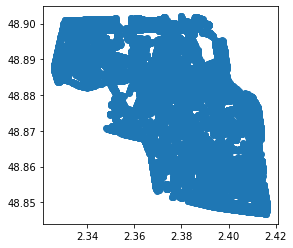

In [70]:
ToI = trees[trees.within(zoi)]
ToI.plot()
ToI

In [71]:
saveGraph(ToI,"ToI")

# Lights

In [72]:
districts = "data/data_original/eclairage-public.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
lights = gpd.read_file(districts, driver='KML')
lights

,Name,Description,geometry
0,BP11374,,POINT (2.30058 48.82562)
1,BP11377,,POINT (2.30068 48.82560)
2,BP11380,,POINT (2.30077 48.82558)
3,BP11391,,POINT (2.30124 48.82536)
4,BP11395,,POINT (2.30085 48.82556)
...,...,...,...
229116,27280,,POINT (2.28588 48.85119)
229117,27359,,POINT (2.31142 48.84825)
229118,27368,,POINT (2.31259 48.85277)
229119,27371,,POINT (2.31196 48.85280)


,Name,Description,geometry
14,BP04437,,POINT (2.41400 48.85408)
158,BP03599,,POINT (2.36035 48.90119)
159,BP03642,,POINT (2.35795 48.90101)
160,BP03646,,POINT (2.35642 48.90108)
161,BP03655,,POINT (2.35205 48.90128)
...,...,...,...
229062,26315,,POINT (2.35090 48.87015)
229074,26461,,POINT (2.38221 48.87872)
229075,26474,,POINT (2.38416 48.87933)
229076,26487,,POINT (2.38688 48.87957)


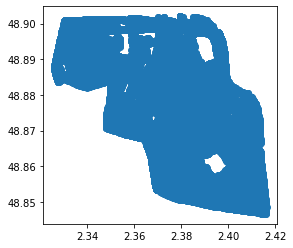

In [73]:
LoI = lights[lights.within(zoi)]
LoI.plot()
saveGraph(LoI,"LoI")
LoI

In [74]:
districts = "data/data_original/fontaines-a-boire.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
fountains = gpd.read_file(districts, driver='KML')
fountains

,Name,Description,geometry
0,450019294,,POINT (2.40023 48.84786)
1,450019292,,POINT (2.40606 48.84734)
2,450024923,,POINT (2.29638 48.83758)
3,450080455,,POINT (2.33825 48.89835)
4,450077011,,POINT (2.29570 48.84696)
...,...,...,...
1190,450019320,,POINT (2.27325 48.84741)
1191,450070406,,POINT (2.27768 48.85779)
1192,450070601,,POINT (2.38286 48.86727)
1193,450080650,,POINT (2.33871 48.87644)


,Name,Description,geometry
3,450080455,,POINT (2.33825 48.89835)
5,450080592,,POINT (2.34978 48.89170)
15,450072538,,POINT (2.34353 48.88812)
16,450072573,,POINT (2.38682 48.88140)
17,450072150,,POINT (2.39144 48.85191)
...,...,...,...
1176,450077519,,POINT (2.37707 48.87455)
1178,450080127,,POINT (2.35057 48.87116)
1183,450080775,,POINT (2.36257 48.89687)
1192,450070601,,POINT (2.38286 48.86727)


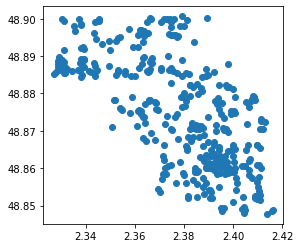

In [75]:
FoI = fountains[fountains.within(zoi)]
FoI.plot()
saveGraph(FoI,"FoI")
FoI

In [ ]:
# Espaces verts

,identifiant,nsq_espace_,nom,type,p_vegetatio,proportion_,adresse,arrondissem,statut_ouve,ouvert_24h,...,horaires_pe,horaires_lu,horaires_ma,horaires_me,horaires_je,horaires_ve,horaires_sa,horaires_di,id_dicom,geometry
0,ID155,920.0,CIMETIERE SAINT-VINCENT,CimetiÃ¨res,0.014936,1.493633,"6, rue Lucien-Gaulard",75018,Ouvert,Non,...,None,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:30 - 18:00,09:00 - 18:00,4484,"POLYGON ((2.33929 48.88939, 2.33928 48.88938, ..."
8,ID732,663.0,Jardin de l'Ã®lot Riquet,Promenades ouvertes,0.249215,24.921454,8 RUE DOCTEUR LAMAZE,75019,Ouvert,Oui,...,Du 01/05/2021 au 31/08/2021,00:00 - 23:59,00:00 - 23:59,00:00 - 23:59,00:00 - 23:59,00:00 - 23:59,00:00 - 23:59,00:00 - 23:59,2657,"POLYGON ((2.37313 48.89046, 2.37326 48.89040, ..."
12,ID812,10963.0,JARDIN DE LA COUR DE LA FERME SAINT-LAZARE,Promenades ouvertes,0.003779,0.377944,6 SQ ALBAN SATRAGNE,75010,None,Non,...,None,None,None,None,None,None,None,None,None,"POLYGON ((2.35456 48.87585, 2.35451 48.87585, ..."
14,ID896,553.0,TERRAIN DE BOULES AVENUE JUNOT,Promenades ouvertes,0.655366,65.536628,8 VOIE M/18,75018,None,Non,...,None,None,None,None,None,None,None,None,None,"POLYGON ((2.33557 48.88821, 2.33558 48.88820, ..."
26,ID1107,746.0,SQUARE SARAH BERNHARDT,Promenades ouvertes,0.309828,30.982784,13 RUE MOUNET SULLY,75020,Ouvert,Non,...,Du 01/05/2021 au 31/08/2021,08:00 - 21:30,08:00 - 21:30,08:00 - 21:30,08:00 - 21:30,08:00 - 21:30,09:00 - 21:30,09:00 - 21:30,1774,"POLYGON ((2.40461 48.84979, 2.40475 48.84962, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,ID1268,535.0,SQUARE DE LA MADONE,Promenades ouvertes,0.515498,51.549802,17 RUE ROSES,75018,Ouvert,Non,...,Du 01/05/2021 au 31/08/2021,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,09:00 - 20:30,09:00 - 20:30,2669,"POLYGON ((2.36173 48.89316, 2.36159 48.89252, ..."
909,ID1242,10996.0,JARDIN RUE DU CHALET,Promenades ouvertes,0.001132,0.113168,18 RUE CHALET,75010,Ouvert,Non,...,Du 01/05/2021 au 31/08/2021,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,09:00 - 20:30,09:00 - 20:30,17442,"MULTIPOLYGON (((2.37343 48.87409, 2.37355 48.8..."
914,ID1353,665.0,SQUARE MARCEL MOULOUDJI,Promenades ouvertes,0.680334,68.033396,12 RUE PIERRE REVERDY,75019,Ouvert,Non,...,Du 19/05/2021 au 31/08/2021,09:30 - 20:30,09:30 - 20:30,09:30 - 20:30,09:30 - 20:30,09:30 - 20:30,09:00 - 20:30,09:00 - 20:30,2659,"POLYGON ((2.37727 48.88572, 2.37768 48.88536, ..."
917,ID1436,740.0,JARDIN DE LA RUE DES COURONNES,Promenades ouvertes,0.528231,52.823115,73 RUE COURONNES,75020,Ouvert,Non,...,Du 01/05/2021 au 31/08/2021,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,08:00 - 20:30,09:00 - 20:30,09:00 - 20:30,2748,"POLYGON ((2.38812 48.87112, 2.38812 48.87112, ..."


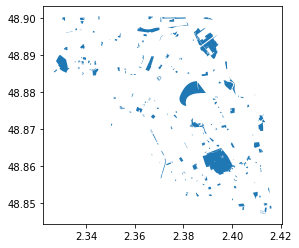

In [77]:
districts = "data/data_original/ilots-de-fraicheur-espaces-verts-frais.zip" 
Bon = gpd.read_file(districts)

FAoI = Bon[Bon.within(zoi)]
FAoI.plot()
saveGraph(FAoI,"FAoI")
FAoI


,Name,Description,geometry
0,Passage du Désir,,"LINESTRING (2.35652 48.87337, 2.35525 48.87370..."
1,Rue Jarry,,"LINESTRING (2.35677 48.87382, 2.35527 48.87416)"
2,Rue Tandou,,"LINESTRING (2.37834 48.88573, 2.37961 48.88607)"
6,Rue Gambey,,"LINESTRING (2.37147 48.86583, 2.37231 48.86464)"
7,Rue Lassus,,"LINESTRING (2.38902 48.87604, 2.38910 48.87544..."
...,...,...,...
138,Rue Popincourt,,"LINESTRING (2.37585 48.85942, 2.37650 48.85855)"
146,Rue Guillaume Bertrand,,"LINESTRING (2.37933 48.86308, 2.38110 48.86387)"
149,Rue d'Avron,,"LINESTRING (2.39867 48.85133, 2.41039 48.85349)"
151,Rue Saint-Maur,,"LINESTRING (2.37039 48.87370, 2.37133 48.87250..."


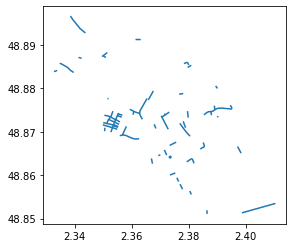

In [78]:
districts = "data/data_original/deconfinement-rues-amenagees-pour-pietons.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
RuesPietonnes = gpd.read_file(districts, driver='KML')
RPoI = RuesPietonnes[RuesPietonnes.within(zoi)]
RPoI.plot()
saveGraph(RPoI,"FoI")
RPoI

,Name,Description,geometry
2,122,,"POLYGON ((2.35479 48.87538, 2.35474 48.87541, ..."
7,763,,"POLYGON ((2.41245 48.87123, 2.41258 48.87131, ..."
8,764,,"POLYGON ((2.39083 48.86639, 2.39091 48.86640, ..."
11,11231,,"POLYGON ((2.36180 48.88663, 2.36184 48.88661, ..."
12,10074,,"POLYGON ((2.38064 48.85612, 2.38067 48.85609, ..."
...,...,...,...
2128,11822,,"MULTIPOLYGON (((2.38757 48.88986, 2.38749 48.8..."
2130,11912,,"MULTIPOLYGON (((2.39398 48.86609, 2.39398 48.8..."
2145,12148,,"POLYGON ((2.38839 48.86608, 2.38861 48.86614, ..."
2146,12182,,"MULTIPOLYGON (((2.39818 48.86560, 2.39817 48.8..."


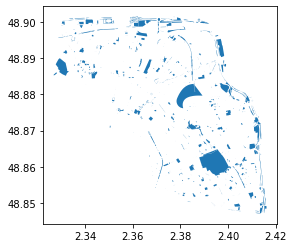

In [79]:
districts = "data/data_original/espaces_verts.kml"
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
EspacesVerts = gpd.read_file(districts, driver='KML')
EVoI = EspacesVerts[EspacesVerts.within(zoi)]
EVoI.plot()
saveGraph(EVoI,"EVoI")
EVoI

In [ ]:
ax = EVoI.plot(figsize=(55, 55), alpha=0.5, edgecolor='k')
BoI.plot(ax=ax, alpha=0.5, color='black')
FoI.plot(ax=ax, alpha=0.99)
FAoI.plot(ax=ax, alpha=0.3)
ToI.plot(ax=ax, alpha=0.03,color="green")
LoI.plot(ax=ax, alpha=0.03,color="orange")

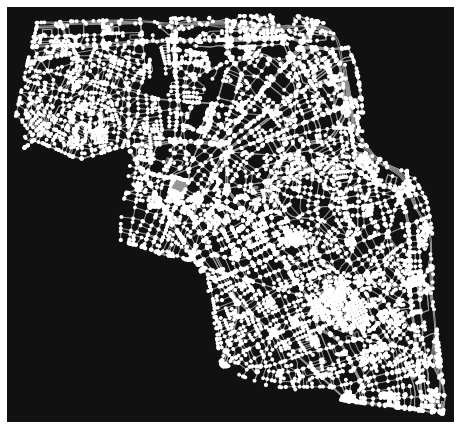

<Figure size 432x288 with 0 Axes>

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [85]:
fig, ax = ox.plot_graph(G2)
ox.plot.plot_footprints(EVoI, ax=ax, figsize=(15, 15))#, color='orange', alpha=None, bgcolor='#111111', bbox=None, save=False, show=True, close=False, filepath=None, dpi=600)

In [89]:
ax = ox.plot.plot_footprints(EVoI, ax=ax, figsize=(15, 15))

<Figure size 432x288 with 0 Axes>

In [88]:
ox.plot(ax)

TypeError: 'module' object is not callable